<a href="https://colab.research.google.com/github/Joel-Williams-Mathew/Unsupervised-Model/blob/main/Image_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🧠 Unsupervised Image Clustering – Code (Python, PyTorch + Sklearn)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


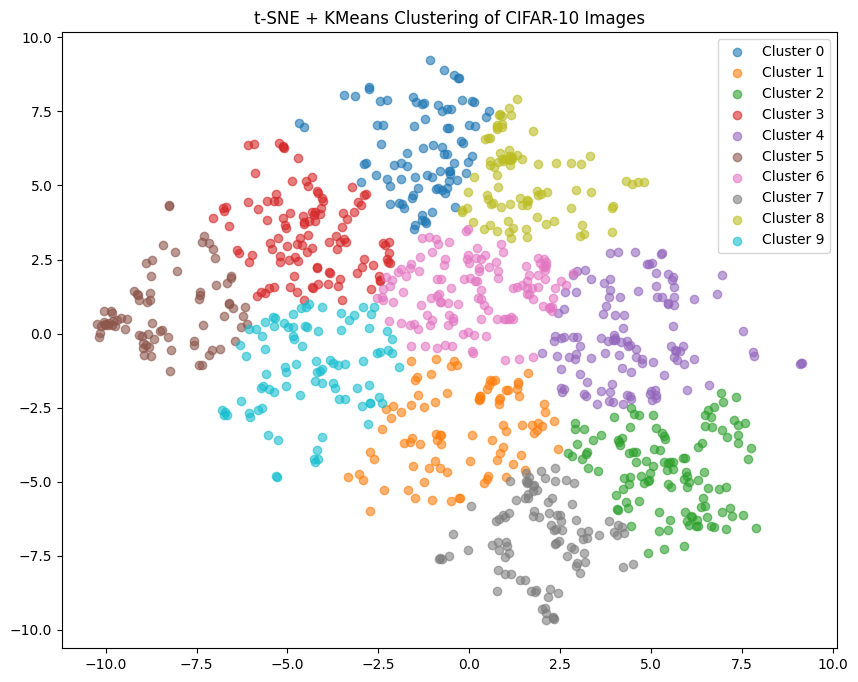

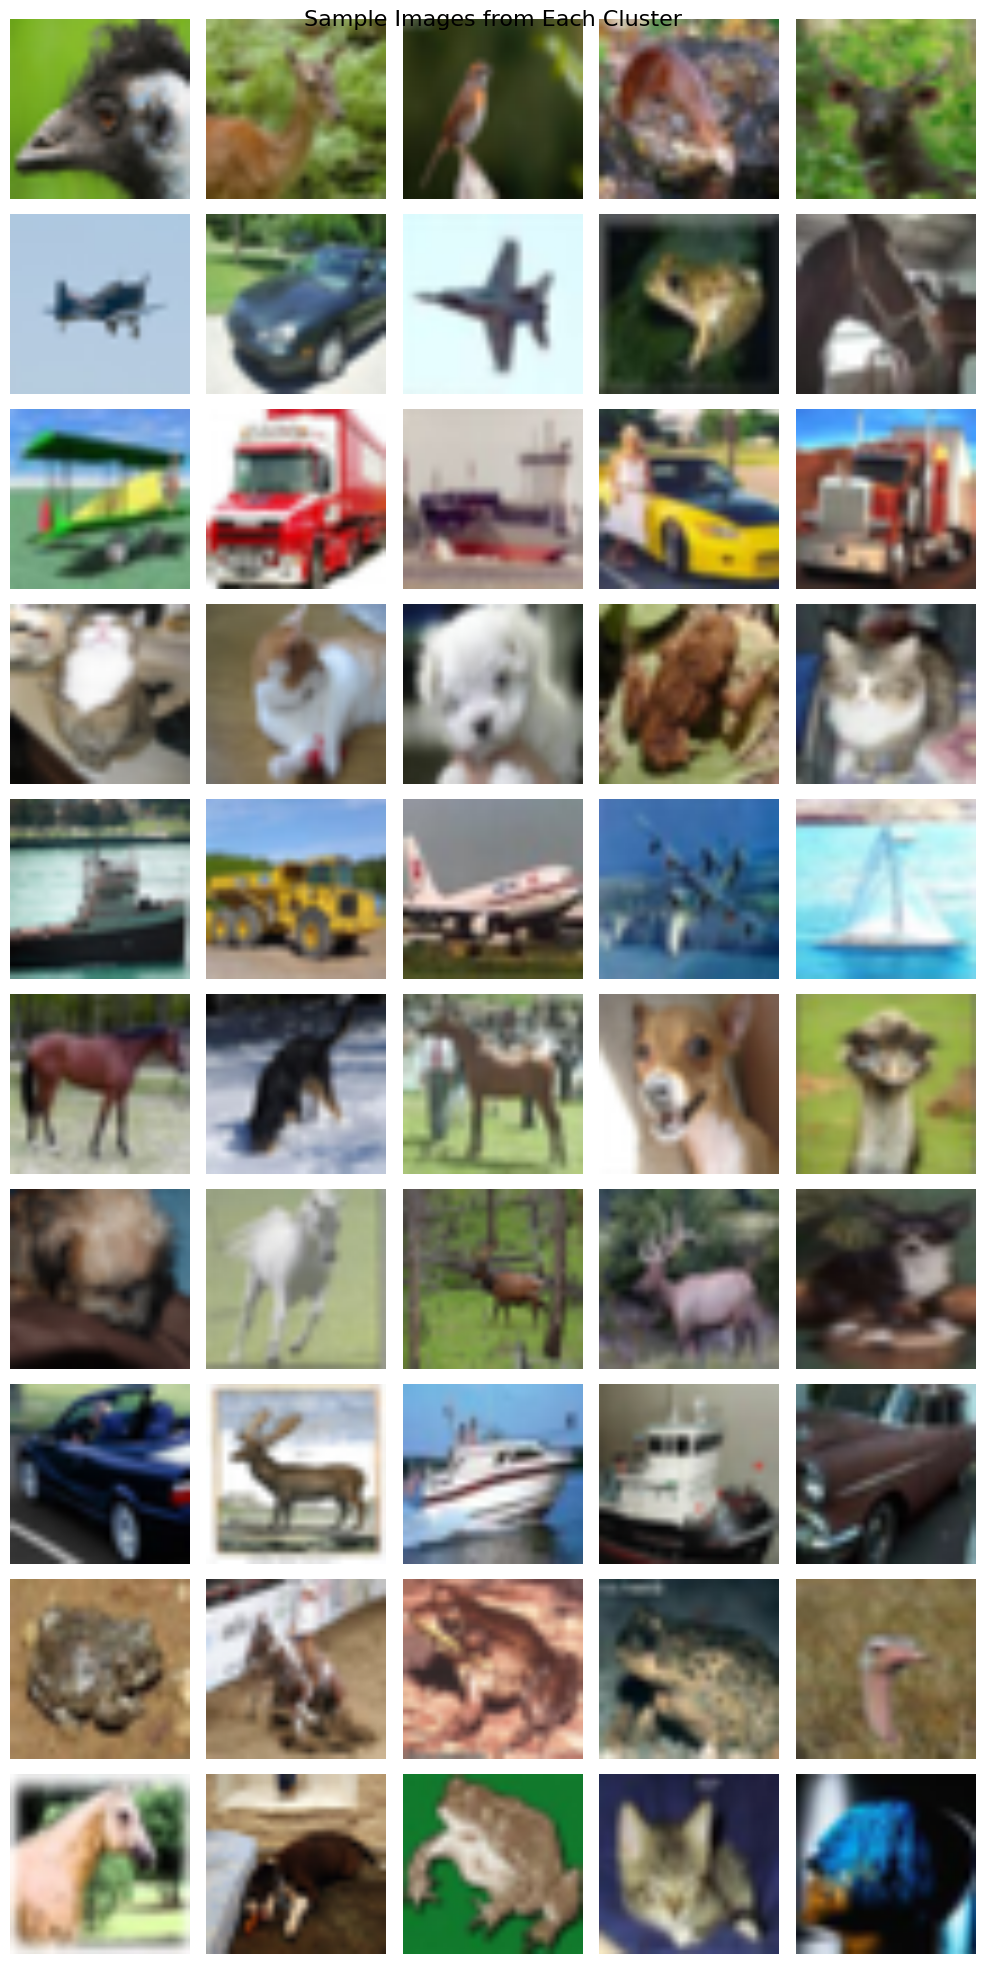

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load CIFAR-10 Dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize for ResNet input
    transforms.ToTensor()
])

dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1000, shuffle=True)

images, labels = next(iter(dataloader))

# Step 2: Load Pre-trained CNN (ResNet18)
resnet = torchvision.models.resnet18(pretrained=True)
resnet.eval()

# Remove the final classification layer (get features)
feature_extractor = nn.Sequential(*list(resnet.children())[:-1])

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
feature_extractor = feature_extractor.to(device)
images = images.to(device)

# Step 3: Extract CNN Features
with torch.no_grad():
    features = feature_extractor(images)
features = features.view(features.size(0), -1)  # Flatten

# Convert to NumPy
features_np = features.cpu().numpy()

# Step 4: t-SNE for Dimensionality Reduction
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
features_2d = tsne.fit_transform(features_np)

# Step 5: Apply K-Means Clustering
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(features_2d)

# Step 6: Visualization
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    idx = clusters == i
    plt.scatter(features_2d[idx, 0], features_2d[idx, 1], label=f"Cluster {i}", alpha=0.6)
plt.title("t-SNE + KMeans Clustering of CIFAR-10 Images")
plt.legend()
plt.show()

import matplotlib.pyplot as plt

# Move original images to CPU for plotting
images_np = images.cpu().permute(0, 2, 3, 1).numpy()

# Plot sample images from each cluster
samples_per_cluster = 5
plt.figure(figsize=(samples_per_cluster * 2, num_clusters * 2))

for cluster_id in range(num_clusters):
    cluster_indices = np.where(clusters == cluster_id)[0][:samples_per_cluster]

    for i, idx in enumerate(cluster_indices):
        plt_idx = cluster_id * samples_per_cluster + i + 1
        plt.subplot(num_clusters, samples_per_cluster, plt_idx)
        plt.imshow(images_np[idx])
        plt.axis('off')
        if i == 0:
            plt.ylabel(f"Cluster {cluster_id}", fontsize=10)

plt.suptitle("Sample Images from Each Cluster", fontsize=16)
plt.tight_layout()
plt.show()
